# EDA on 2016 data set for the Hack The Wind 2018

### Changing directory 

In [56]:
import os
os.chdir('D:\Education\Hackathon2018\pre2016')

### Ingesting data with Pandas 

In [57]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
wind_signals= pd.read_csv('htw-wind-farm-1-signals-2016.csv', sep=';')
wind_errors= pd.read_csv('htw-failures-2016.csv', sep=';')
#wind_signals= pd.read_csv('D:\Education\Hackathon2018\2016\htw-wind-farm-1-signals-2016', sep=';')
#wind_signals.isnull().any()
wind_signals = wind_signals.interpolate() # interpolate to remove NA

## Functions

### Function to find the relevant columns for analysis

In [58]:
def fin_par(par,col):
    par_str = []
    for i in col:
        if par in i:
            par_str.append(i)
    return par_str

### Slicing function for the turbine data

In [59]:
def sli_turbine(Turbine,df):
    Tur_wind_signals =df[df['Turbine_ID'] == Turbine].sort_index(ascending=True)
    return Tur_wind_signals 

### Function to extract values between a given start and end time

In [60]:
def giv_time(df1,start_time,end_time):
    r_df1 = df1[(df1.index > start_time) & (df1.index <= end_time)]
    return r_df1

### Making the timestamp as index
   Converterd it to datetime format

In [61]:
wind_signals['Timestamp'] = pd.to_datetime(wind_signals['Timestamp'])
wind_signals.index = wind_signals['Timestamp']
#del wind_signals['Timestamp']

In [62]:
T06 = sli_turbine('T06',wind_signals) #Fn used to slice relevant turbine data
T06

,Turbine_ID,Timestamp,Gen_RPM_Max,Gen_RPM_Min,Gen_RPM_Avg,Gen_RPM_Std,Gen_Bear_Temp_Avg,Gen_Phase1_Temp_Avg,Gen_Phase2_Temp_Avg,Gen_Phase3_Temp_Avg,...,Grd_Prod_Pwr_Min,Grd_Busbar_Temp_Avg,Rtr_RPM_Std,Grd_Prod_Pwr_Std,Grd_Prod_ReactPwr_Avg,Grd_Prod_ReactPwr_Max,Grd_Prod_ReactPwr_Min,Grd_Prod_ReactPwr_Std,Gen_Bear2_Temp_Avg,Nac_Direction_Avg
Timestamp,,,,,,,,,,,,,,,,,,,,,
2016-01-01 00:00:00,T06,2016-01-01 00:00:00,1270.0,1232.8,1248.5,6.8,42.0,51.0,52.0,53.0,...,-17.8,37.0,0.1,36.9,-75.5,0.1,-94.0,16.5,35.0,204.6
2016-01-01 00:10:00,T06,2016-01-01 00:10:00,1429.7,203.9,1154.1,271.7,42.0,51.0,52.0,52.0,...,-32.1,37.0,2.4,38.4,-21.1,16.4,-94.9,29.7,35.0,210.5
2016-01-01 00:20:00,T06,2016-01-01 00:20:00,1360.5,250.3,1041.4,382.7,42.0,50.0,51.0,51.0,...,-28.6,37.0,3.4,27.8,-24.9,22.0,-100.0,35.0,35.0,199.0
2016-01-01 00:30:00,T06,2016-01-01 00:30:00,1399.2,1228.8,1252.5,16.5,42.0,49.0,50.0,50.0,...,-52.5,37.0,0.1,48.9,-90.3,1.2,-104.9,24.8,35.0,205.6
2016-01-01 00:40:00,T06,2016-01-01 00:40:00,1302.7,1225.1,1257.6,13.4,41.0,50.0,50.0,51.0,...,117.2,37.0,0.1,52.0,-98.1,-92.7,-106.1,3.6,35.0,207.4
2016-01-01 00:50:00,T06,2016-01-01 00:50:00,1298.7,1236.3,1257.9,10.8,41.0,50.0,51.0,51.0,...,93.7,37.0,0.1,60.3,-99.4,-86.8,-108.0,5.5,35.0,203.2
2016-01-01 01:00:00,T06,2016-01-01 01:00:00,1332.0,1230.7,1259.3,17.1,42.0,50.0,51.0,52.0,...,67.2,37.0,0.1,65.1,-81.8,-75.8,-89.0,3.3,35.0,210.9
2016-01-01 01:10:00,T06,2016-01-01 01:10:00,1271.1,1226.9,1250.3,7.7,42.0,50.0,51.0,52.0,...,-4.0,37.0,0.1,51.8,-74.8,0.2,-87.1,14.7,35.0,204.6
2016-01-01 01:20:00,T06,2016-01-01 01:20:00,1298.6,1233.2,1255.5,13.1,42.0,51.0,51.0,52.0,...,25.7,37.0,0.1,62.2,-81.3,-73.0,-94.1,4.3,35.0,214.0


# T06 turbine analysis

In [63]:
T06_errors = sli_turbine('T06',wind_errors)
T06_errors

,Turbine_ID,Component,Timestamp,Remarks
0,T06,GENERATOR,2016-09-04 08:08:00,High temperature generator error
5,T06,GENERATOR,2016-07-11 19:48:00,Generator replaced
6,T06,GENERATOR,2016-10-27 16:26:00,Generator replaced
9,T06,HYDRAULIC_GROUP,2016-04-04 18:53:00,Error in pitch regulation
13,T06,GENERATOR,2016-07-24 17:01:00,Generator temperature sensor failure
14,T06,GENERATOR,2016-10-02 17:08:00,Refrigeration system and temperature sensors i...


In [64]:
gen_par = fin_par('Gen',T06.columns) #Fn used to find the str and par for the analysis
gentemp_par = fin_par('Temp', gen_par) #
gentemp_par

['Gen_Bear_Temp_Avg',
 'Gen_Phase1_Temp_Avg',
 'Gen_Phase2_Temp_Avg',
 'Gen_Phase3_Temp_Avg',
 'Gen_SlipRing_Temp_Avg',
 'Gen_Bear2_Temp_Avg']

In [65]:
T06[gentemp_par].describe()

,Gen_Bear_Temp_Avg,Gen_Phase1_Temp_Avg,Gen_Phase2_Temp_Avg,Gen_Phase3_Temp_Avg,Gen_SlipRing_Temp_Avg,Gen_Bear2_Temp_Avg
count,50579.000000,50579.000000,50579.000000,50579.000000,50579.000000,50579.000000
mean,45.007572,58.030273,59.999440,58.537239,29.255630,40.271671
std,17.105537,26.155916,27.788955,25.945306,9.679831,14.347463
min,18.000000,21.000000,21.000000,21.000000,13.000000,20.000000
25%,33.000000,37.000000,38.000000,37.000000,23.000000,31.000000
50%,43.000000,54.000000,55.000000,55.000000,27.000000,37.000000
75%,52.000000,66.000000,69.000000,68.000000,34.000000,48.000000
max,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000


### Plotting temperature values for T06 turbine

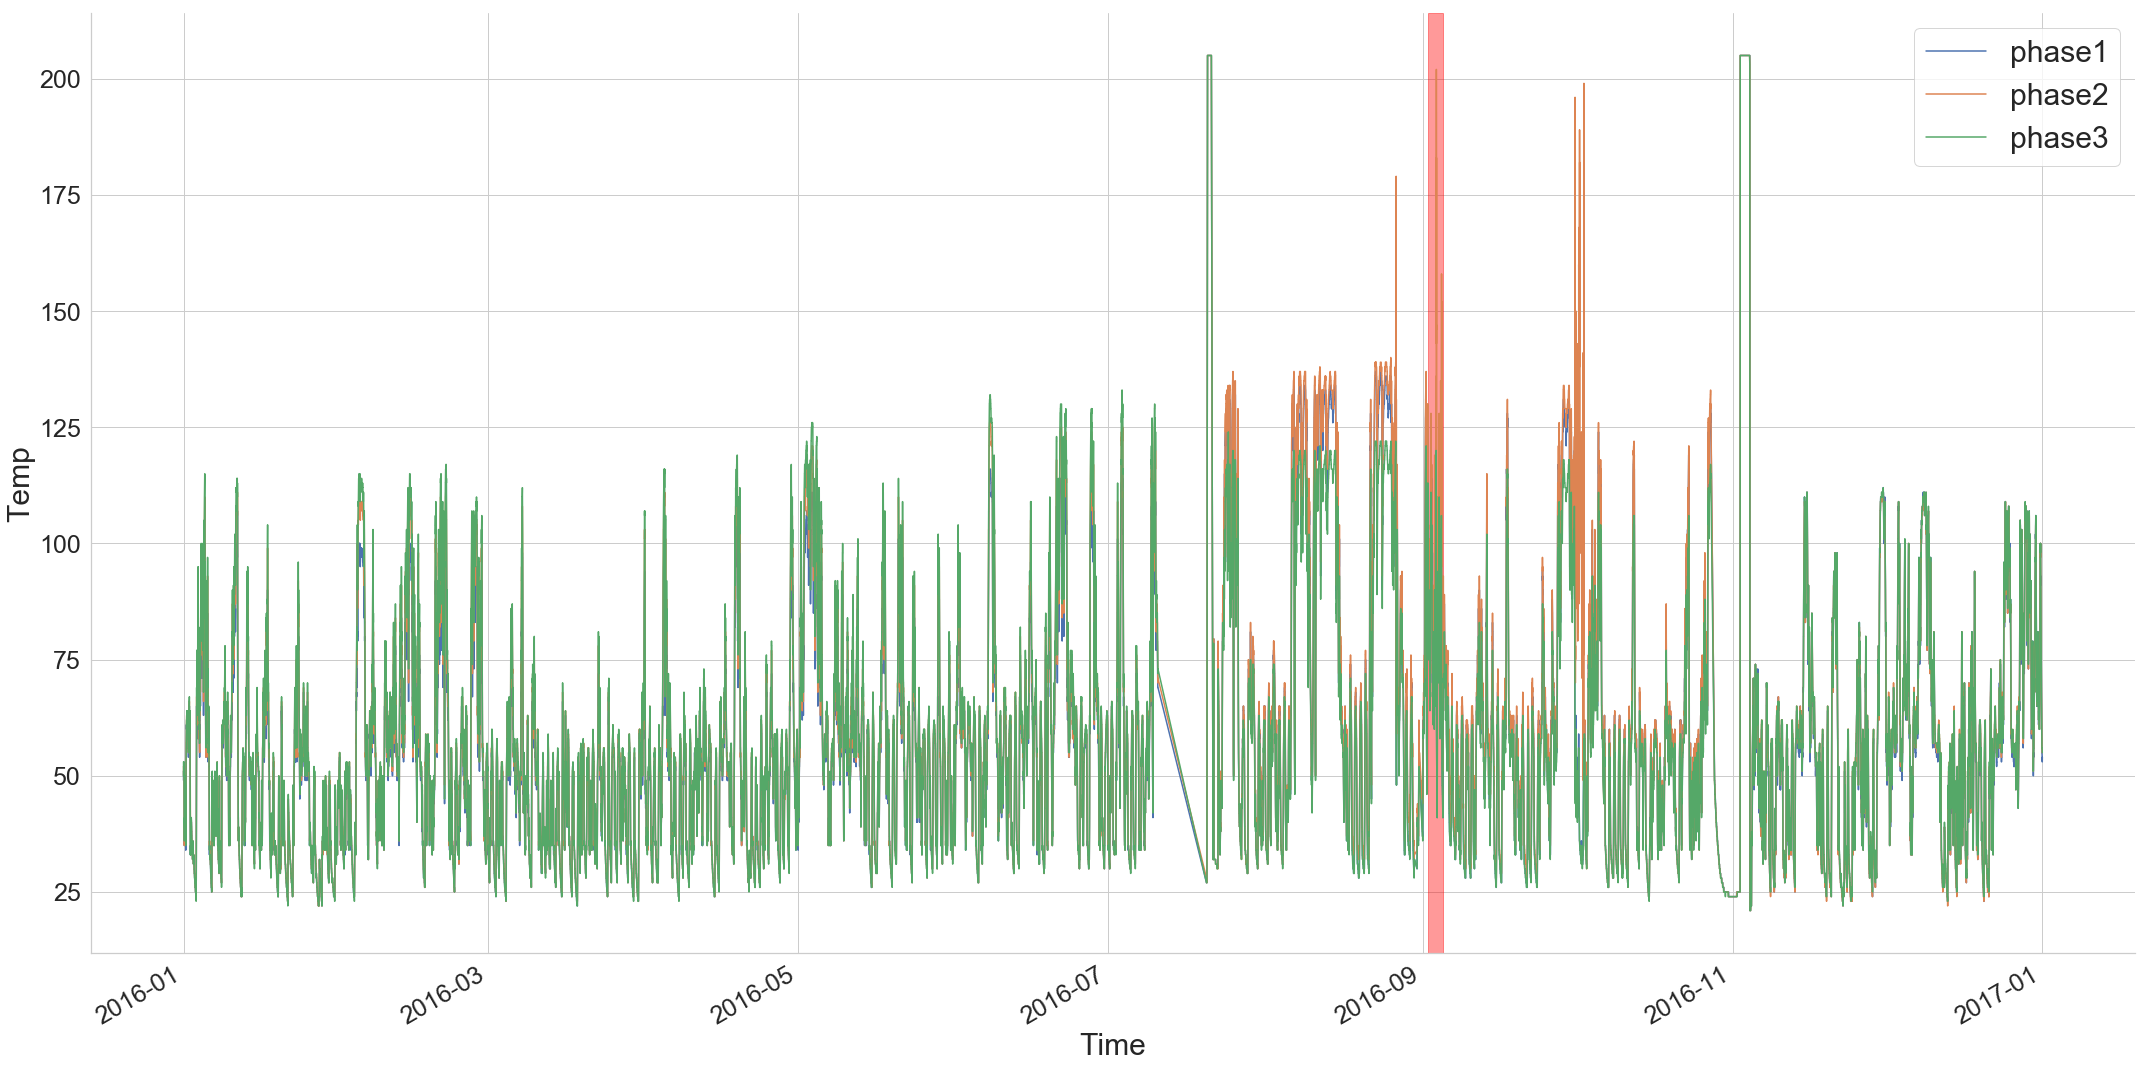

In [81]:
plt.rcParams['figure.figsize'] =(30,15)
sns.set_style("whitegrid")
plt.rc('xtick', labelsize=25)
plt.rc('ytick', labelsize=25)
fig, axis = plt.subplots()
T06.Gen_Phase1_Temp_Avg.plot(label='phase1')
T06.Gen_Phase2_Temp_Avg.plot(label='phase2')
T06.Gen_Phase3_Temp_Avg.plot(label='phase3')
axis.set_xlabel('Time',fontsize=30)
axis.set_ylabel('Power (W)',fontsize=30)
plt.axvspan('2016-09-02 00:00:00','2016-09-04 23:00:00', color='red', alpha=0.4)
#axis.yaxis.set_tick_params(labelsize=15)
plt.legend(prop={'size': 30})
plt.tight_layout()
plt.ylabel("Temp")
sns.despine()

In [67]:
T06_errors

,Turbine_ID,Component,Timestamp,Remarks
0,T06,GENERATOR,2016-09-04 08:08:00,High temperature generator error
5,T06,GENERATOR,2016-07-11 19:48:00,Generator replaced
6,T06,GENERATOR,2016-10-27 16:26:00,Generator replaced
9,T06,HYDRAULIC_GROUP,2016-04-04 18:53:00,Error in pitch regulation
13,T06,GENERATOR,2016-07-24 17:01:00,Generator temperature sensor failure
14,T06,GENERATOR,2016-10-02 17:08:00,Refrigeration system and temperature sensors i...


### Plotting the T06 generator temperatures around the area of failure

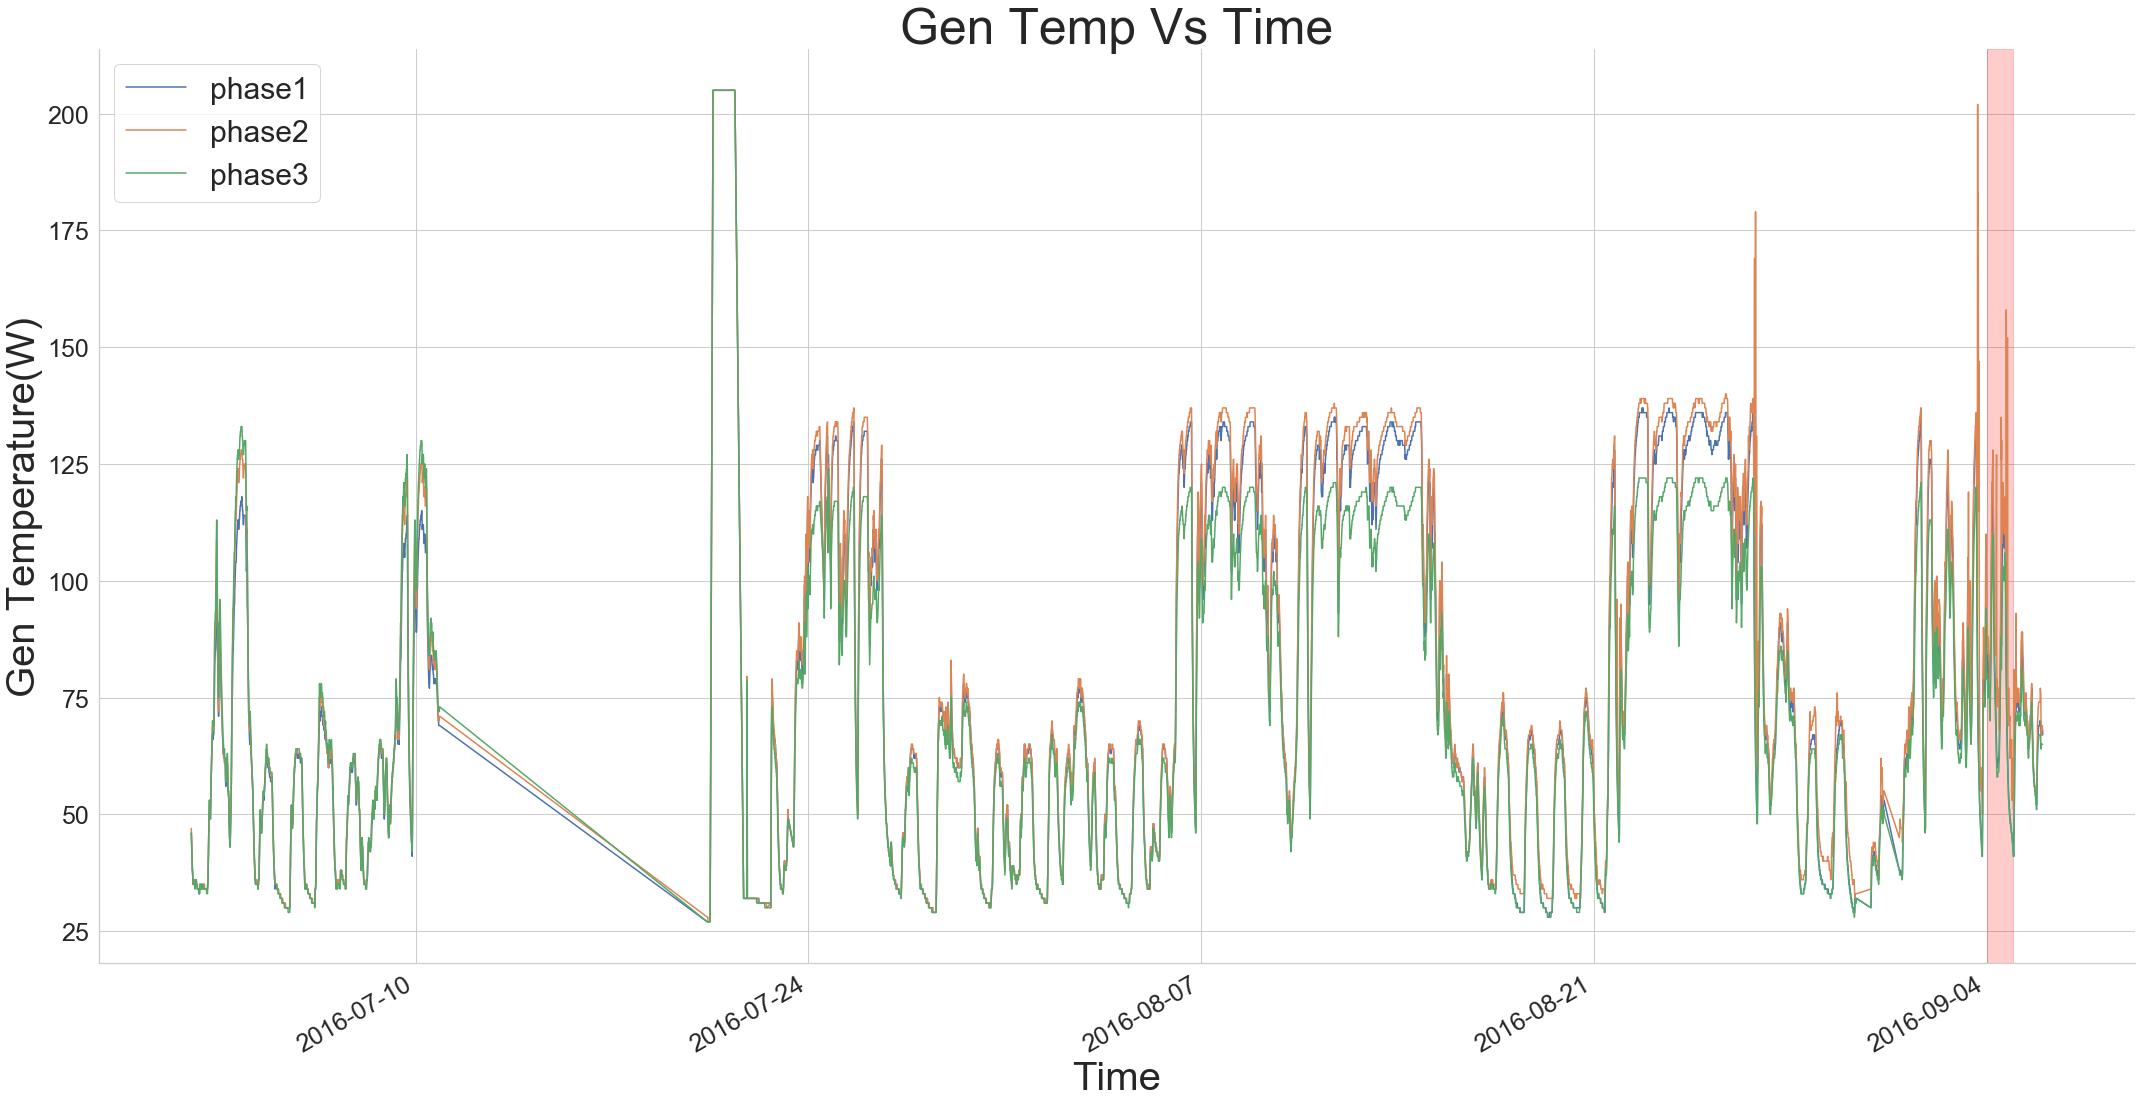

In [85]:
plt.rc('xtick', labelsize=25)
plt.rc('ytick', labelsize=25)
sns.set_style("whitegrid")
fig, axis = plt.subplots()
T06_temerr = giv_time(T06,'2016-07-02 00:00:00','2016-09-06 00:00:00') #Fn used to extract the values bt str & end
T06_temerr.Gen_Phase1_Temp_Avg.plot(label='phase1')
T06_temerr.Gen_Phase2_Temp_Avg.plot(label='phase2')
T06_temerr.Gen_Phase3_Temp_Avg.plot(label='phase3')
axis.set_xlabel('Time',fontsize=40)
axis.set_ylabel('Gen Temperature(W)',fontsize=40)
plt.legend(prop={'size': 30})
plt.tight_layout()
plt.title("Gen Temp Vs Time",fontsize=50)
sns.despine()
plt.axvspan('2016-09-04 00:00:00','2016-09-04 23:00:00', color='red', alpha=0.2)
#plt.axvspan('2016-08-21 00:00:00', '2016-08-23 00:00:00', color='red', alpha=0.5)
#2016-09-04 08:08:00

In [69]:
pitch_par = fin_par('Pitch',T06.columns)
hyd_par = fin_par('Hyd',T06.columns)
print(hyd_par) 
pitch_par

['Hyd_Oil_Temp_Avg']


['Blds_PitchAngle_Min',
 'Blds_PitchAngle_Max',
 'Blds_PitchAngle_Avg',
 'Blds_PitchAngle_Std']

In [70]:
T06[pitch_par].describe() 

,Blds_PitchAngle_Min,Blds_PitchAngle_Max,Blds_PitchAngle_Avg,Blds_PitchAngle_Std
count,50579.000000,50579.000000,50579.000000,50579.000000
mean,7.540891,14.730715,10.248543,1.677262
std,18.127545,20.743358,18.230517,4.158200
min,-3.300000,-2.200000,-2.300000,0.000000
25%,-2.400000,0.300000,-1.600000,0.100000
50%,-2.100000,5.500000,0.200000,0.400000
75%,21.200000,24.000000,24.000000,0.900000
max,90.000000,90.000000,90.000000,45.000000


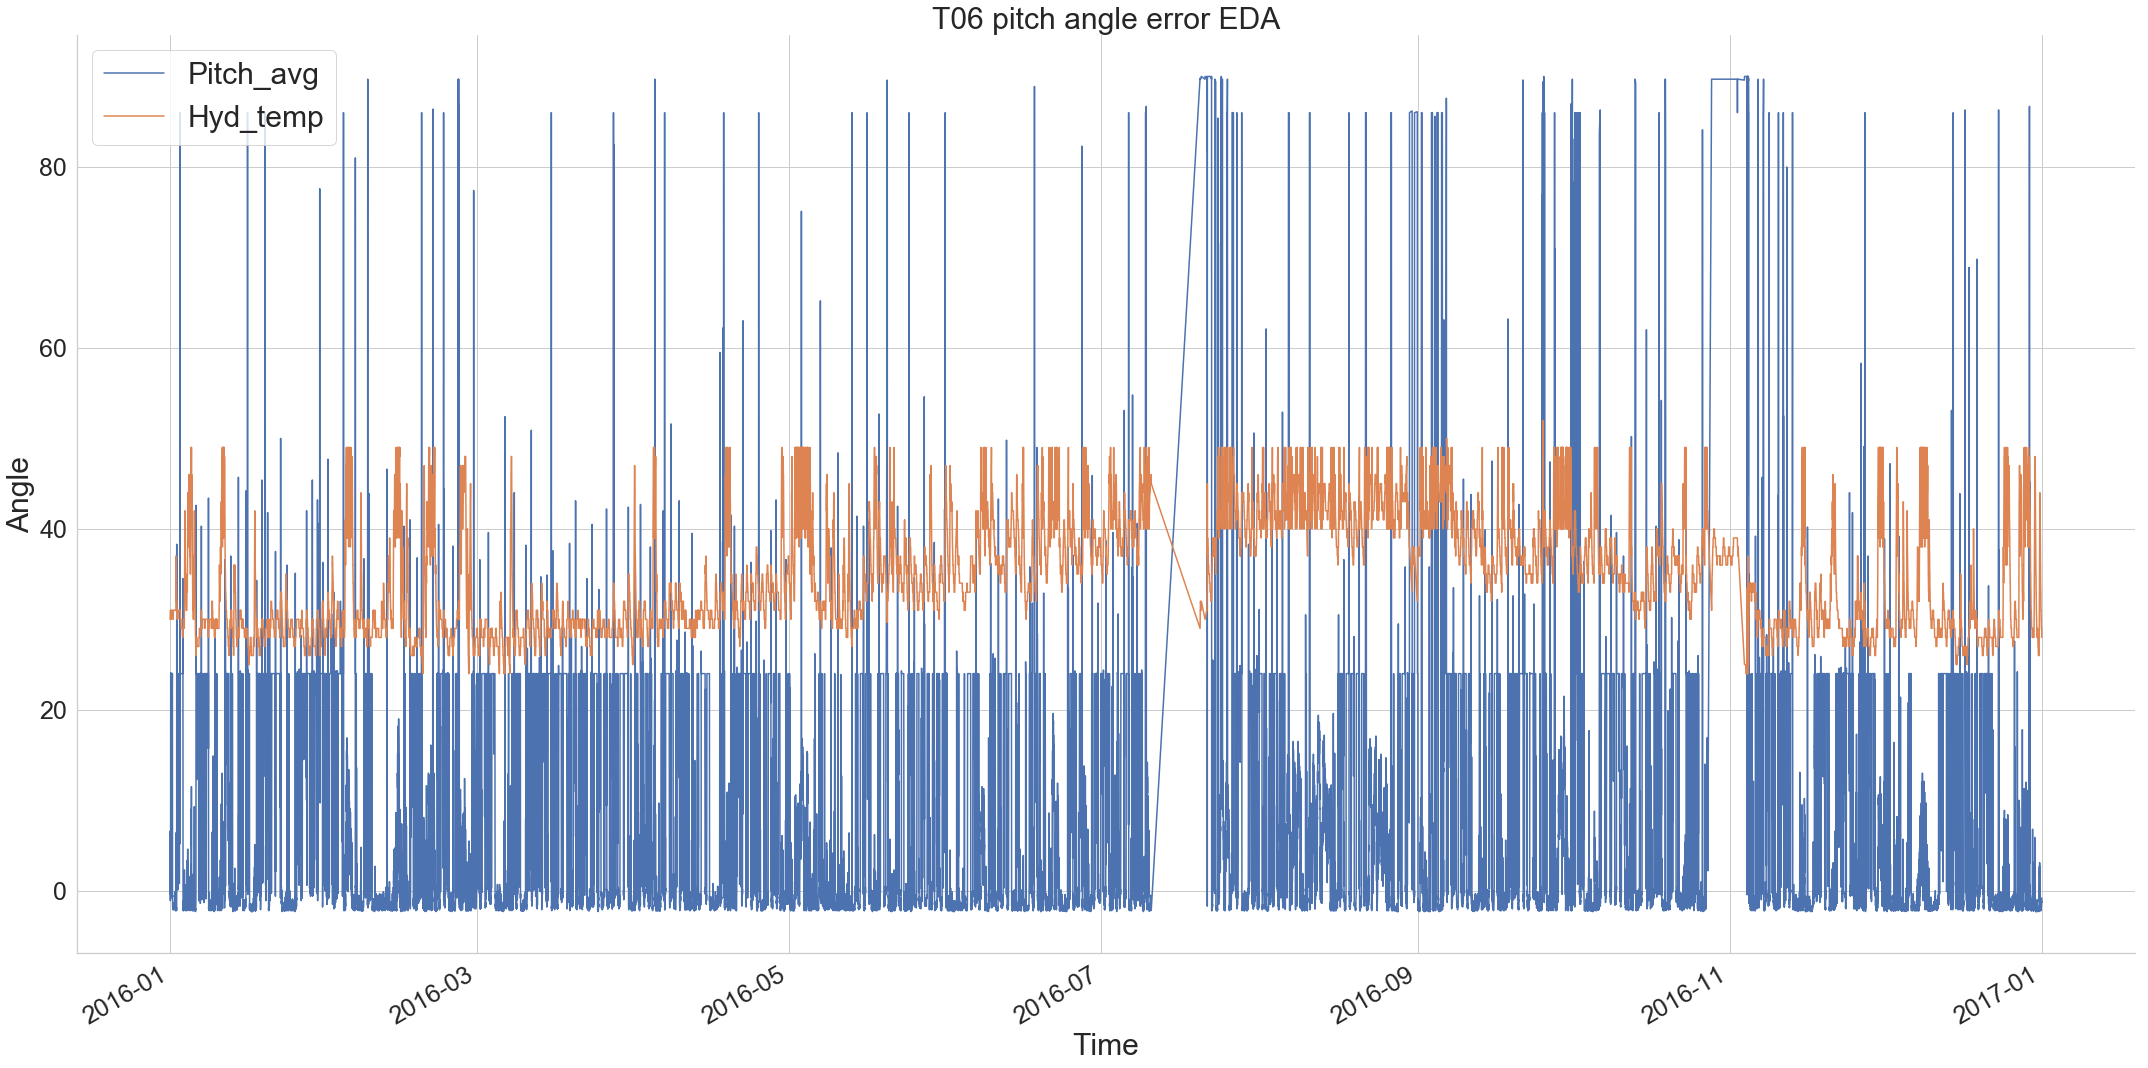

In [71]:
plt.rcParams['figure.figsize'] =(30,15)
sns.set_style("whitegrid")
plt.rc('xtick', labelsize=25)
plt.rc('ytick', labelsize=25)
fig, axis = plt.subplots()
T06.Blds_PitchAngle_Avg.plot(label='Pitch_avg')
T06.Hyd_Oil_Temp_Avg.plot(label='Hyd_temp')
#T06.Blds_PitchAngle_Max.plot(label='Pitch_max')
axis.set_xlabel('Time',fontsize=30)
axis.set_ylabel('Angle',fontsize=30)
#axis.yaxis.set_tick_params(labelsize=15)
plt.title("T06 pitch angle error EDA",size=30)
plt.legend(prop={'size':30})
plt.tight_layout()
sns.despine()

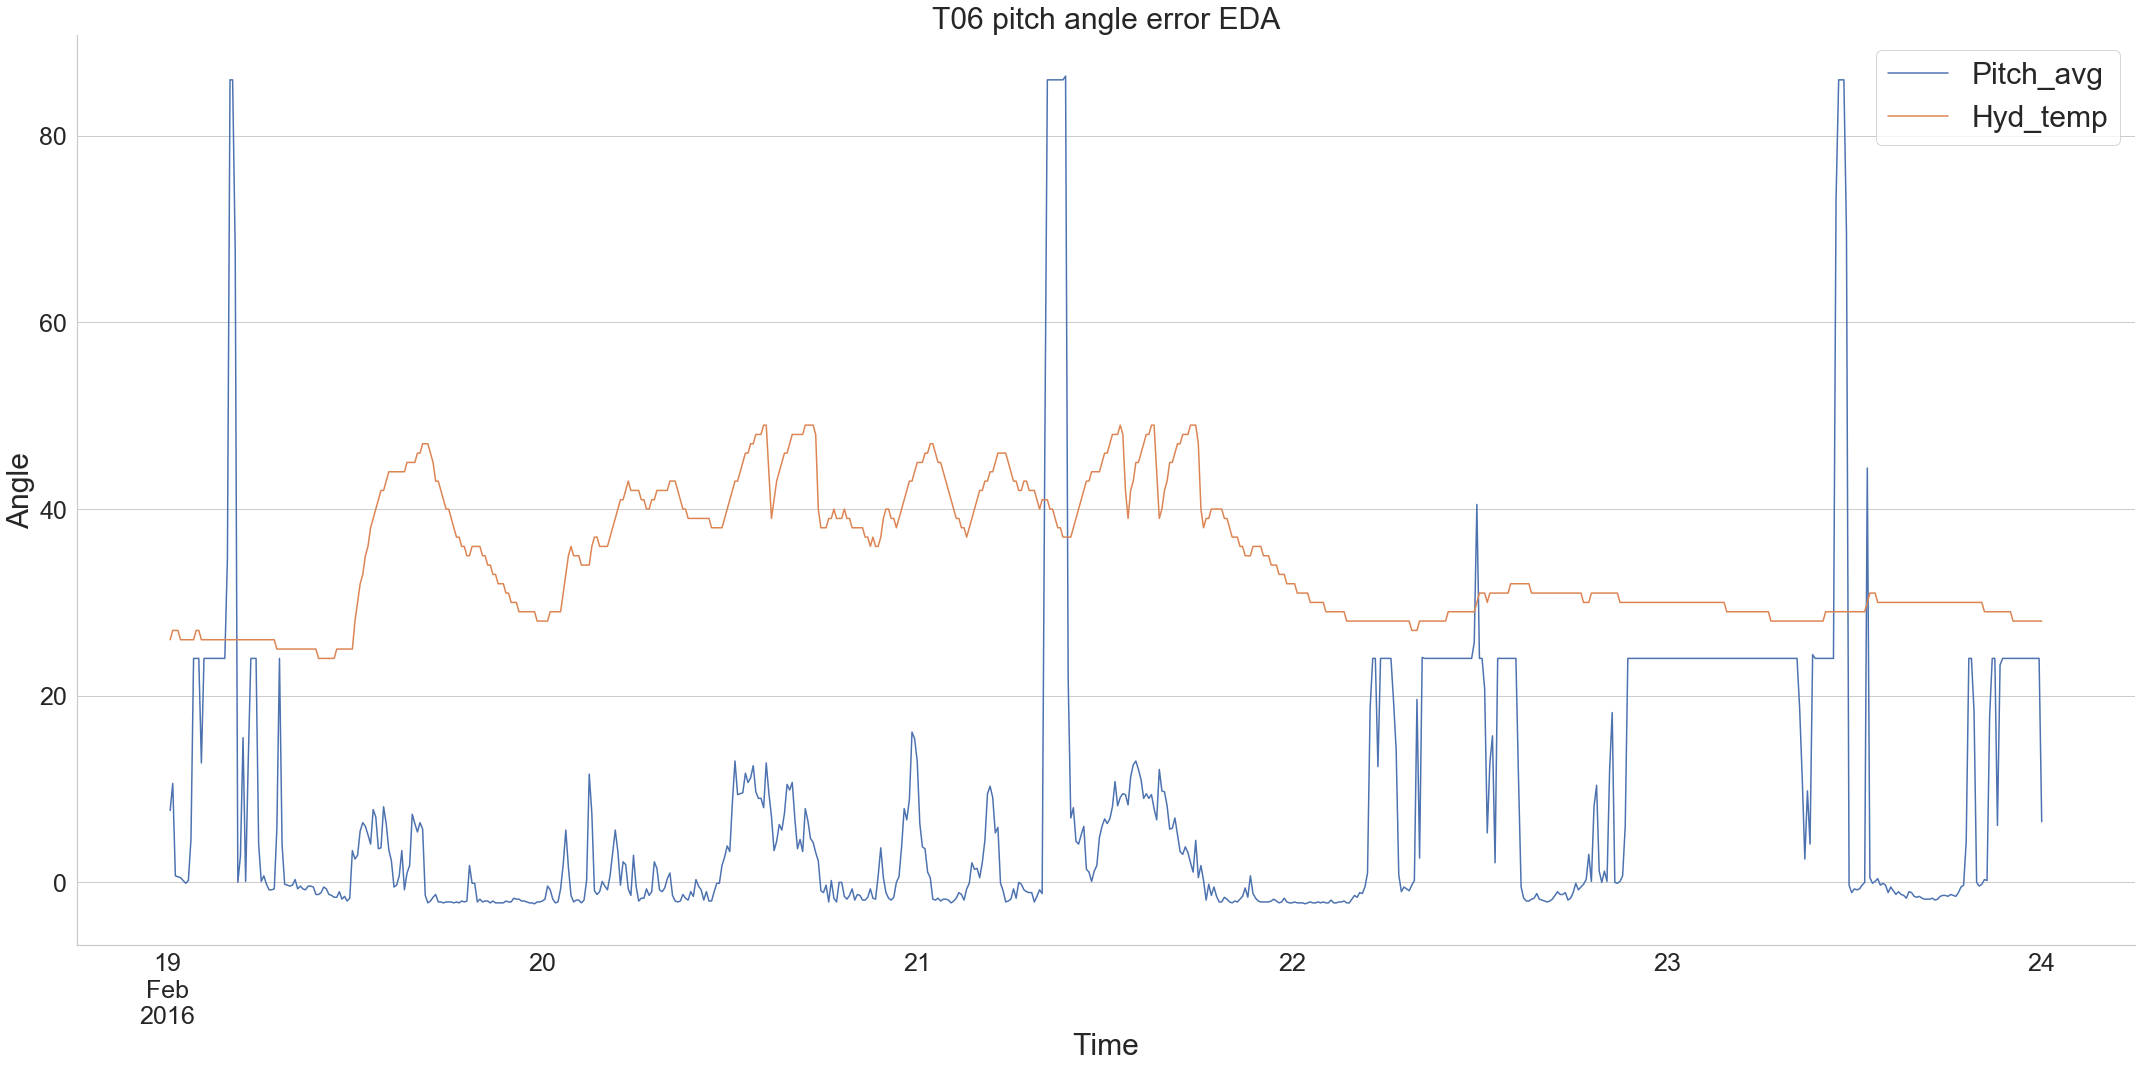

In [76]:
plt.rcParams['figure.figsize'] =(30,15)
sns.set_style("whitegrid")
plt.rc('xtick', labelsize=25)
plt.rc('ytick', labelsize=25)
fig, axis = plt.subplots()
T06_pitcherr = giv_time(T06,'2016-02-19 00:00:00','2016-02-24 00:00:00') # Actual err on  	2016-04-04 18:53:00
T06_pitcherr.Blds_PitchAngle_Avg.plot(label='Pitch_avg')
T06_pitcherr.Hyd_Oil_Temp_Avg.plot(label='Hyd_temp')
#T06_pitcherr.Gen_Phase3_Temp_Avg.plot(label='phase3')
axis.set_xlabel('Time',fontsize=30)
axis.set_ylabel('Angle',fontsize=30)
#axis.yaxis.set_tick_params(labelsize=15)
plt.title("T06 pitch angle error EDA",size=30)
plt.legend(prop={'size':30})
plt.tight_layout()
sns.despine()

In [14]:
T07 = sli_turbine('T07',wind_signals)
T07

,Turbine_ID,Timestamp,Gen_RPM_Max,Gen_RPM_Min,Gen_RPM_Avg,Gen_RPM_Std,Gen_Bear_Temp_Avg,Gen_Phase1_Temp_Avg,Gen_Phase2_Temp_Avg,Gen_Phase3_Temp_Avg,...,Grd_Prod_Pwr_Min,Grd_Busbar_Temp_Avg,Rtr_RPM_Std,Grd_Prod_Pwr_Std,Grd_Prod_ReactPwr_Avg,Grd_Prod_ReactPwr_Max,Grd_Prod_ReactPwr_Min,Grd_Prod_ReactPwr_Std,Gen_Bear2_Temp_Avg,Nac_Direction_Avg
Timestamp,,,,,,,,,,,,,,,,,,,,,
2016-01-01 00:00:00,T07,2016-01-01 00:00:00,1317.5,1229.5,1254.9,13.8,41.0,62.0,62.0,61.0,...,-11.5,36.0,0.1,75.2,-71.7,0.2,-95.0,24.7,39.0,197.3
2016-01-01 00:10:00,T07,2016-01-01 00:10:00,1271.1,1233.4,1251.9,7.1,42.0,62.0,62.0,62.0,...,-1.9,36.0,0.1,37.1,-86.5,0.2,-102.3,21.6,39.0,203.9
2016-01-01 00:20:00,T07,2016-01-01 00:20:00,1276.7,1229.1,1251.1,9.5,42.0,62.0,62.0,62.0,...,12.9,36.0,0.1,46.7,-93.1,-33.8,-107.6,13.4,39.0,197.0
2016-01-01 00:30:00,T07,2016-01-01 00:30:00,1408.5,1227.0,1259.9,25.4,42.0,63.0,62.0,62.0,...,30.5,36.0,0.2,76.9,-98.7,-88.7,-106.2,3.4,39.0,204.0
2016-01-01 00:40:00,T07,2016-01-01 00:40:00,1366.1,1236.5,1288.2,32.8,42.0,63.0,63.0,63.0,...,187.0,36.0,0.3,55.4,-98.1,-92.2,-106.2,3.6,40.0,203.9
2016-01-01 00:50:00,T07,2016-01-01 00:50:00,1389.5,1236.5,1284.1,29.7,42.0,64.0,64.0,63.0,...,163.9,37.0,0.3,71.5,-99.4,-85.7,-108.0,5.5,40.0,197.0
2016-01-01 01:00:00,T07,2016-01-01 01:00:00,1318.7,1236.1,1263.8,17.0,43.0,64.0,64.0,63.0,...,104.5,37.0,0.1,53.5,-81.9,-74.9,-89.0,3.3,40.0,203.3
2016-01-01 01:10:00,T07,2016-01-01 01:10:00,1272.9,1229.2,1250.2,8.5,43.0,64.0,64.0,63.0,...,1.8,37.0,0.1,42.5,-77.2,-9.2,-87.1,8.7,40.0,203.3
2016-01-01 01:20:00,T07,2016-01-01 01:20:00,1293.0,1230.3,1254.0,11.4,43.0,64.0,64.0,63.0,...,25.1,37.0,0.1,67.4,-81.3,-73.0,-94.0,4.3,40.0,209.2
